# **Titanic Survival Prediction**

**Problem Statement** : The sinking of the Titanic is one of the most infamous shipwrecks in history.

In this challenge, we need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Work Flow
1. Get Data
2. Data Pre Processing
3. Data Analysis
4. Train Test Split(But given dataset is already splitted)
5. Logistic Regression Model
6. Evaluation

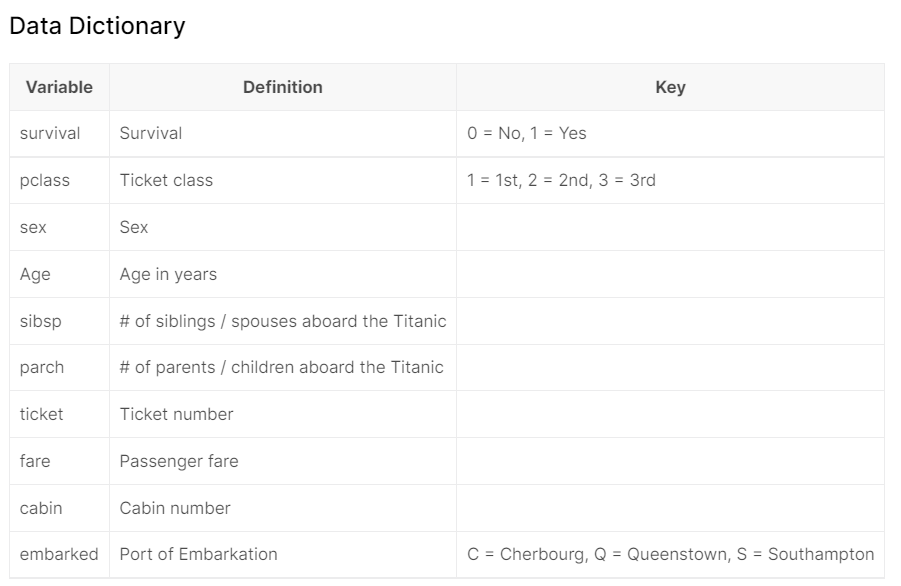

---
## Train Model...

In [1]:
# Import dependencies...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset...

train_ds = pd.read_csv(r'./titanic/train.csv')

In [3]:
train_ds.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_ds.shape

(891, 12)

In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

---
### Handling Missing Values

In [7]:
# Drop the Cabin columns, because we not gonna use this...

train_ds = train_ds.drop(columns = 'Cabin', axis = 1)

In [8]:
# Case : Fill mean value to Age...

train_ds['Age'].fillna(train_ds['Age'].mean(), inplace = True)

In [9]:
# Replace the mode value in Embarked...

print(train_ds['Embarked'].mode()[0])

S


In [10]:
# Fill mode value to Embarked...

train_ds['Embarked'].fillna(train_ds['Embarked'].mode()[0], inplace = True)

In [11]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


---
### Data Analysis...

In [12]:
train_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Numbers of people survived and not survived...

train_ds['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

---
### Data Visualization...

In [14]:
sns.set()

C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


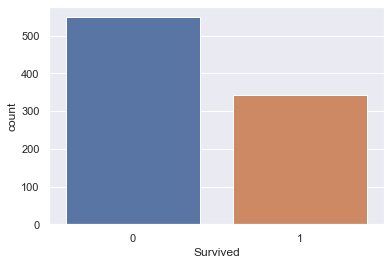

In [15]:
# making a value_count plot for "Survived" column...

sns.countplot('Survived', data=train_ds)
plt.show()

In [16]:
train_ds['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

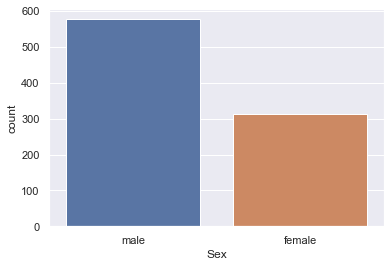

In [17]:
# making a value_count plot for "Sex" column...

sns.countplot('Sex', data=train_ds)

C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

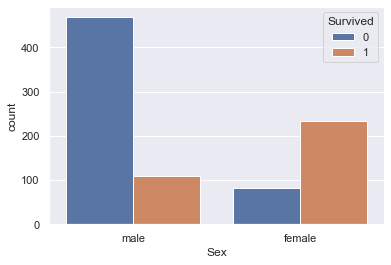

In [18]:
# number of survivors Gender wise...

sns.countplot('Sex', hue='Survived', data=train_ds)

C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

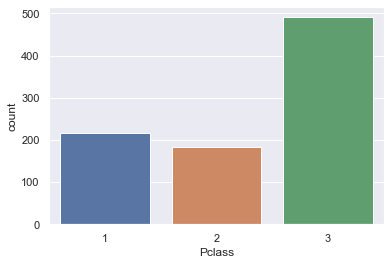

In [19]:
# making a value_count plot for "Pclass" column...

sns.countplot('Pclass', data=train_ds)

C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

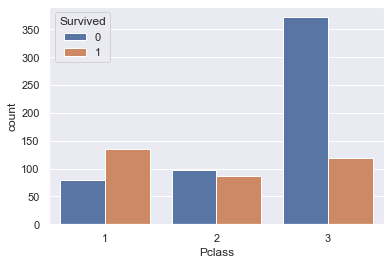

In [20]:
sns.countplot('Pclass', hue='Survived', data=train_ds)

---
### Encoding the Categorical Columns 

In [21]:
# Encode labels in column 'Sex'...

le = LabelEncoder()
train_ds['Sex'] = le.fit_transform(train_ds['Sex'])

In [22]:
train_ds['Embarked'] = le.fit_transform(train_ds['Embarked'])

In [23]:
# For train Data...

train_X = train_ds.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
train_Y = train_ds['Survived']

### Using Logistic Regression Algo to train model...

In [24]:
model = LogisticRegression()

In [25]:
# training the Logistic Regression model with training data...

model.fit(train_X, train_Y)

LogisticRegression()

---
## Model Evaluation...

In [26]:
test_X = pd.read_csv(r'./titanic/test.csv', usecols = ['Pclass','Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

In [27]:
# Lable Encoding...

test_X['Sex'] = le.fit_transform(test_X['Sex'])
test_X['Embarked'] = le.fit_transform(test_X['Embarked'])

In [28]:
test_X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


In [29]:
test_X.shape

(418, 7)

In [30]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [31]:
test_X.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [32]:
# Case : Fill mean value to Age...

test_X['Age'].fillna(test_X['Age'].mean(), inplace = True)

In [33]:
# Fill mode value to Fare...

test_X['Fare'].fillna(test_X['Fare'].mode()[0], inplace = True)

In [34]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [35]:
# accuracy on training data...

X_test_prediction = model.predict(test_X)

In [36]:
print(X_test_prediction)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [37]:
PassengerId = pd.read_csv(r'./titanic/test.csv')

In [38]:
#submit file...

submit = pd.DataFrame({'PassengerId': PassengerId.PassengerId, 'Survived': X_test_prediction})
submit.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!


In [39]:
given_result = pd.read_csv('gender_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'gender_submission.csv'

In [ ]:
# Cross check ...

test_data_accuracy = accuracy_score(X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)